In [1]:
from functions import*

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
# ticker var
ticker = "NFLX"

#df with all the news for a given stock
news_df = get_news_df(ticker)

In [3]:
# now = pd.to_datetime('now') #datetime object
now = pd.to_datetime('now') #datetime.date object to only get the date
yesterday = (pd.to_datetime('now') - pd.Timedelta('1 day'))

In [4]:
news_df_last_2_days = news_df[news_df.index >= yesterday]

In [5]:
news_df_last_2_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-08-15 09:38:00 to 2023-08-14 16:47:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   6 non-null      object
 1   Link    6 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


Now we have our DataFrame with the chosen Stock and a chosen timeframe (yesterday till today)
Next we can loop through the news articles with the previous function

In [6]:
dummy_url = 'https://finance.yahoo.com/news/apple-debuts-programs-highlighting-data-privacy-and-security-160057954.html'
url = dummy_url

In [7]:
# news_df_last_2_days_with_polarities = getPolaritiesFromDf(news_df_last_2_days)
#news_df_last_2_days_with_polarities.head()
#news_df_last_2_days_with_polarities.dropna(inplace=True)
#get_polarity_per_day_on_df(news_df_last_2_days_with_polarities)

In [8]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-08-15 09:38:00 to 2023-07-24 14:56:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   Link    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [41]:
# we get the polarities for all the dates not just the last 2 days
# so we can plot more info

# df with the sentiment scores for each article (will be used for info showing)
news_df_with_polarities = getPolaritiesFromDf(news_df)
news_df_with_polarities.dropna(inplace=True)

In [76]:
news_df_with_polarities.tail()

,Title,Link,PolaritySummary,PolarityFulltext,Summary,Fulltext,VaderSummary,VaderFulltext,model_summary,model_fulltext
Date,,,,,,,,,,
2023-07-25 06:45:00,2 Growth Stocks That Look Like Bad Deals for I...,https://finance.yahoo.com/m/024296f3-9785-367f...,0.023856,0.057576,2 Growth Stocks That Look Like Bad Deals for I...,2 Growth Stocks That Look Like Bad Deals for I...,0.9615,0.9976,0.0,1.0
2023-07-24 21:16:00,Lee Ainslie: Washington Commanders and Other I...,https://finance.yahoo.com/news/lee-ainslie-was...,0.109091,0.122970,Lee Ainslie: Washington Commanders and Other I...,Lee Ainslie: Washington Commanders and Other I...,0.4019,0.9964,0.0,0.0
2023-07-24 16:22:00,Hollywood strikes could cost economy $4 billio...,https://finance.yahoo.com/video/hollywood-stri...,0.138095,0.076422,Hollywood strikes could cost economy $4 billio...,Hollywood strikes could cost economy $4 billio...,0.5948,0.9968,0.0,0.0
2023-07-24 15:34:00,Netflix: There Is More to the Story,https://finance.yahoo.com/news/netflix-more-st...,0.196154,0.115439,Netflix: There Is More to the Story\nshares of...,Netflix: There Is More to the Story\nshares of...,0.9769,0.9995,0.0,1.0
2023-07-24 14:56:00,"Tom Russo Net Worth, Performance and Portfolio",https://finance.yahoo.com/news/tom-russo-net-w...,0.138333,0.125935,"Tom Russo Net Worth, Performance and Portfolio...","Tom Russo Net Worth, Performance and Portfolio...",0.8957,0.9996,0.0,0.0


In [42]:
# df with polarity scores per day (will be used for plotting )
df_daily_sentiment = get_polarity_per_day_on_df(news_df_with_polarities)

In [43]:
# now that we have the 4 different sentiment scores for each date, we will merge that together in a new df
# with the daily prices so we can plot that

# we get the first and last day of the dates available in the daily sentiment df
# so that we can get the prices for the days inbetween 
first_date = df_daily_sentiment.index.min()
last_date = df_daily_sentiment.index.max()

In [44]:
df_prices = get_df_for_ticker_on_date(ticker, first_date, last_date)

In [45]:
print(first_date,'\n',last_date)

2023-07-24 
 2023-08-15


In [46]:
df_prices.head()

,Open,High,Low,Close,Volume
date,,,,,
2023-07-24,425.00,428.6400,419.19,428.37,8282434.0
2023-07-25,427.18,430.8799,426.13,427.70,4859843.0
2023-07-26,424.20,425.2600,415.59,422.67,6009242.0
2023-07-27,426.90,427.5200,411.88,413.17,6594466.0
2023-07-28,415.56,427.4700,413.76,425.78,6428073.0


In [47]:
df_prices.head()

,Open,High,Low,Close,Volume
date,,,,,
2023-07-24,425.00,428.6400,419.19,428.37,8282434.0
2023-07-25,427.18,430.8799,426.13,427.70,4859843.0
2023-07-26,424.20,425.2600,415.59,422.67,6009242.0
2023-07-27,426.90,427.5200,411.88,413.17,6594466.0
2023-07-28,415.56,427.4700,413.76,425.78,6428073.0


In [48]:
# so we will merge df_prices and df_daily_sentiment

In [49]:
merged_df =  merge_df_price_and_df_mean_polarities(df_prices, df_daily_sentiment)

In [50]:
merged_df.head(6)

,Open,High,Low,Close,Volume,PolaritySummary,PolarityFulltext,VaderSummary,VaderFulltext,model_summary,model_fulltext
2023-07-24,425.00,428.6400,419.19,428.37,8282434.0,0.145418,0.110191,0.717325,0.998075,0.000000,0.250000
2023-07-25,427.18,430.8799,426.13,427.70,4859843.0,0.074538,0.123455,0.635533,0.992283,0.333333,0.500000
2023-07-26,424.20,425.2600,415.59,422.67,6009242.0,0.115807,0.118682,0.510850,0.695700,0.500000,0.500000
2023-07-27,426.90,427.5200,411.88,413.17,6594466.0,0.025672,0.070838,0.313592,0.656542,0.083333,0.333333
2023-07-28,415.56,427.4700,413.76,425.78,6428073.0,0.091604,0.109006,0.716450,0.993167,0.000000,0.166667
2023-07-29,NaN,NaN,NaN,NaN,NaN,0.101667,0.124179,0.636900,0.988100,0.000000,0.000000


In [51]:
# we make a new column CloseNextDay with the price of the next day because we want to predict the price
# and if we already know the closing price of the current day then the sentiment score of the current day
# wont be relevant i assume
# but we will put both prices at test
merged_df['CloseNextDay'] = merged_df['Close'].shift(-1)

In [52]:
merged_df.head(6)
merged_df.dropna(inplace=True)

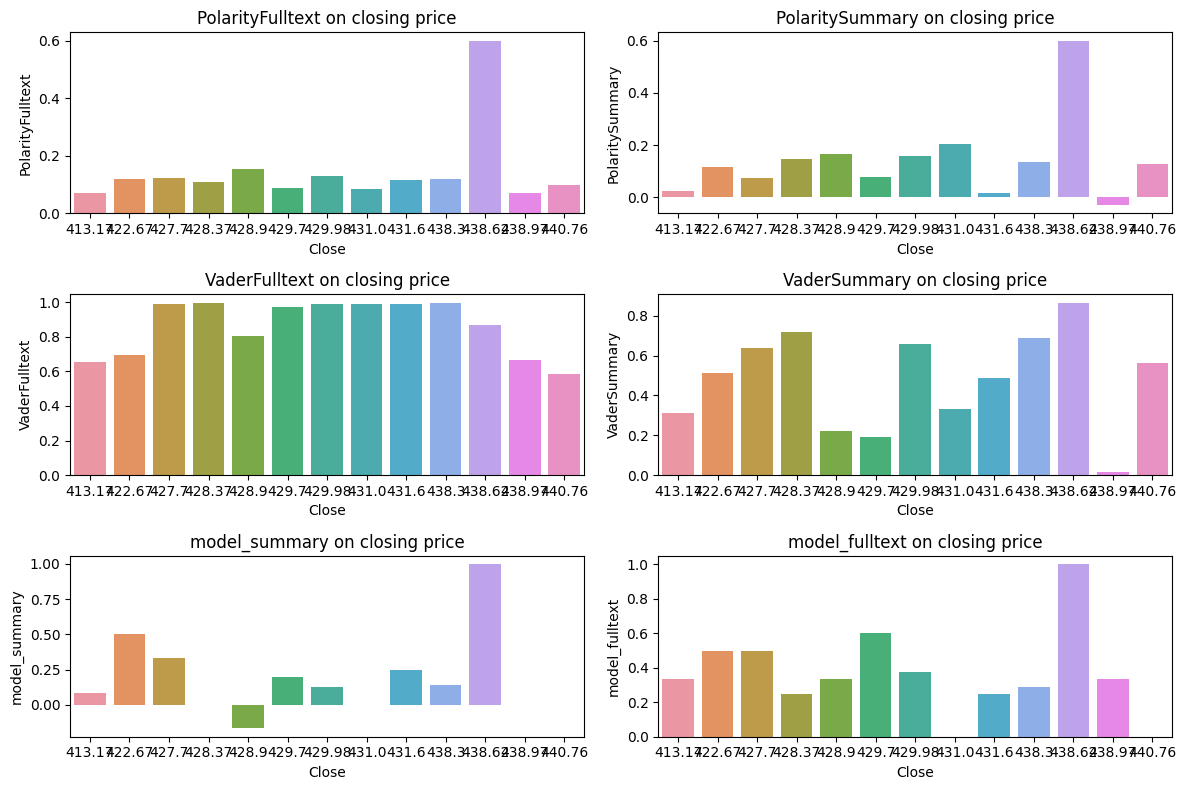

In [78]:
columns_to_plot = ['PolarityFulltext', 'PolaritySummary', 'VaderFulltext', 'VaderSummary', 'model_summary', 'model_fulltext']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
# Loop through each column and create a bar plot on a specific axis
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    sns.barplot(data=merged_df, x='Close', y=column, ax=ax)
    ax.set_title(column + ' on closing price')

plt.tight_layout()
plt.show()

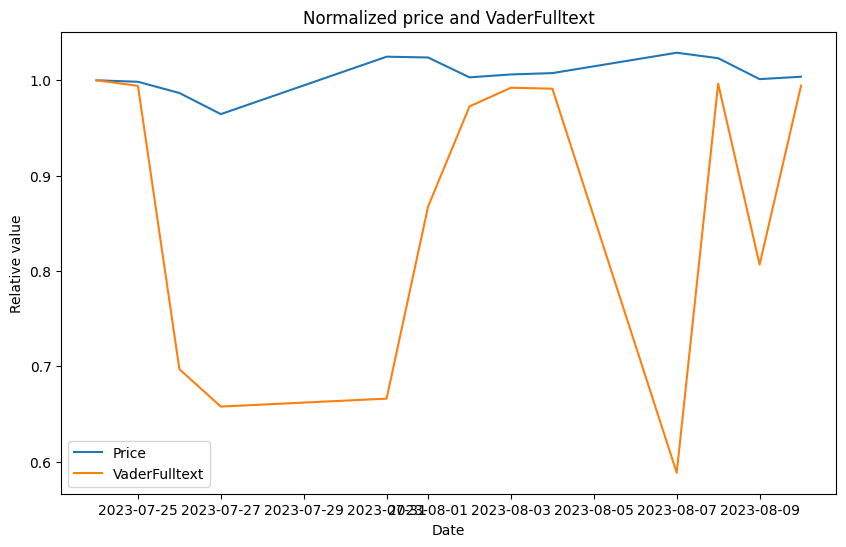

In [89]:
plt.figure(figsize=(10, 6))
# we take the normalized data so its easier to compare from a starting value
# Normalize columns by dividing by their first value
price_normalized = merged_df['Close'] / merged_df['Close'].iloc[0]
vader_normalized = merged_df['VaderFulltext'] / merged_df['VaderFulltext'].iloc[0]
plt.plot(price_normalized, label='Price')
plt.plot(vader_normalized, label='VaderFulltext')
plt.xlabel('Date')
plt.ylabel('Relative value')
plt.title('Normalized price and VaderFulltext')
plt.legend()
plt.show()
#this is still not easy to read

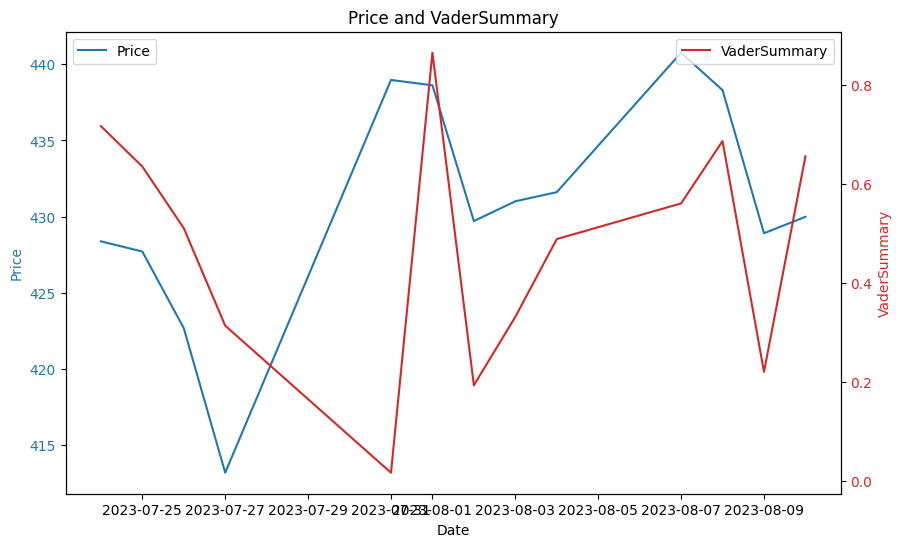

In [92]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_df['Close'], color='tab:blue', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(merged_df['VaderSummary'], color='tab:red', label='VaderSummary')
ax2.set_ylabel('VaderSummary', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('Price and VaderSummary')
plt.show()

In [56]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable

cols = ['PolarityFulltext','VaderSummary']
features = merged_df[cols]  # Choose your features here
target = merged_df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.285318718823017


In [57]:

input_features = np.array([[0.1, 0.3]])  # Replace with your desired values
predicted_close = model.predict(input_features)

print("Predicted Close Price:", model.predict(input_features))

Predicted Close Price: [430.15206691]


c:\Users\ali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
# importing our own little dataset with the label
df = pd.read_csv('dataset.txt', sep='\t+', header=None , encoding="ISO-8859-1")
temp = df.copy()
temp['message'] = temp[0].str.split('@').str[0]
temp['score'] = temp[0].str.split('@').str[1]
temp.drop(df.columns[0], axis=1, inplace=True)
temp.head()

dataset = temp.copy()
dataset["id"] = dataset.index + 1
dataset = dataset[['id', 'message', 'score']]

C:\Users\ali\AppData\Local\Temp\ipykernel_11568\945077660.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('dataset.txt', sep='\t+', header=None , encoding="ISO-8859-1")


In [59]:
dataset.head(5)

,id,message,score
0,1,"According to Gran , the company has no plans t...",neutral
1,2,"For the last quarter of 2010 , Componenta 's n...",positive
2,3,"In the third quarter of 2010 , net sales incre...",positive
3,4,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,5,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Step 1: Load and Preprocess the Data

X = dataset['message']
y = dataset['score']

# Step 2: Convert Sentiment Labels to Numeric Values
y_numeric = y.map({'positive': 1, 'negative': -1, 'neutral': 0})

# Step 3: Text Feature Extraction (Using TF-IDF)
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_numeric, test_size=0.2, random_state=42)

# Step 5: Train a Sentiment Analysis Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8543046357615894
Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.52      0.64        56
           0       0.85      0.99      0.92       276
           1       0.86      0.69      0.77       121

    accuracy                           0.85       453
   macro avg       0.85      0.73      0.78       453
weighted avg       0.85      0.85      0.84       453



In [62]:
def predict_sent(new_text_message):
    # Preprocess the new text message (tokenization, lowercase, etc.)
    # You should apply the same preprocessing steps as during training
    
    # Convert the new text message to a numerical representation using TF-IDF
    new_message_tfidf = vectorizer.transform([new_text_message])

    # Use the trained model to predict the sentiment score
    predicted_sentiment = model.predict(new_message_tfidf)
    return predicted_sentiment


In [63]:
news_df_with_polarities.head()

,Title,Link,PolaritySummary,PolarityFulltext,Summary,Fulltext,VaderSummary,VaderFulltext,model_summary,model_fulltext
Date,,,,,,,,,,
2023-08-15 09:38:00,The Changing Entertainment Landscape,https://finance.yahoo.com/m/516e8504-f955-3616...,0.195833,0.124507,The Changing Entertainment Landscape\nthings l...,The Changing Entertainment Landscape\nin this ...,0.9448,1.0000,0.0,0.0
2023-08-15 07:23:00,5 Things to Know Before Markets Open,https://finance.yahoo.com/m/608d51e4-d187-312c...,-0.019697,-0.043273,5 Things to Know Before Markets Open\nconsumer...,5 Things to Know Before Markets Open\nconsumer...,0.7717,0.9827,0.0,1.0
2023-08-15 06:40:00,1 Major Red Flag With Disney's Latest Earnings...,https://finance.yahoo.com/m/59be6fe4-5cce-3981...,0.187500,0.113838,1 Major Red Flag With Disney's Latest Earnings...,1 Major Red Flag With Disney's Latest Earnings...,0.4378,0.9353,0.0,1.0
2023-08-14 17:12:00,Netflix's launches video game streaming servic...,https://finance.yahoo.com/video/netflixs-launc...,0.035000,0.108378,Netflix's launches video game streaming servic...,Netflix's launches video game streaming servic...,0.4019,0.9940,0.0,0.0
2023-08-14 16:47:00,Ruane Cunniff's Q2 2023 13F Filing Update: Key...,https://finance.yahoo.com/news/ruane-cunniffs-...,0.084375,0.023864,Ruane Cunniff's Q2 2023 13F Filing Update: Key...,Ruane Cunniff's Q2 2023 13F Filing Update: Key...,0.8020,0.9873,0.0,0.0
